In [2]:
import pandas as pd 
import pyodbc

In [3]:
conn_str = (
    "DRIVER={SQL Server};"
    'SERVER=localhost\\SQLEXPRESS;'
    'DATABASE=Sales_trends_DB;'
    'Trusted_Connection=yes;'
)

In [4]:
conn = pyodbc.connect(conn_str)

In [5]:
query = "SELECT * FROM dbo.shopping_trends"
df = pd.read_sql(query, conn)

df 

C:\Users\Al-Huda\AppData\Local\Temp\ipykernel_11788\184325055.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_USD       3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [7]:
df.duplicated().sum()

0

In [8]:
df.Customer_ID.nunique()

3900

In [9]:
#df.drop(columns=['Customer_ID'], inplace=True)

In [10]:
df.describe()

,Customer_ID,Age,Purchase_Amount_USD,Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [11]:
df.Purchase_Amount_USD.mean()+(df.Purchase_Amount_USD.std() * 3)

130.8205357269849

<Axes: xlabel='Purchase_Amount_USD'>

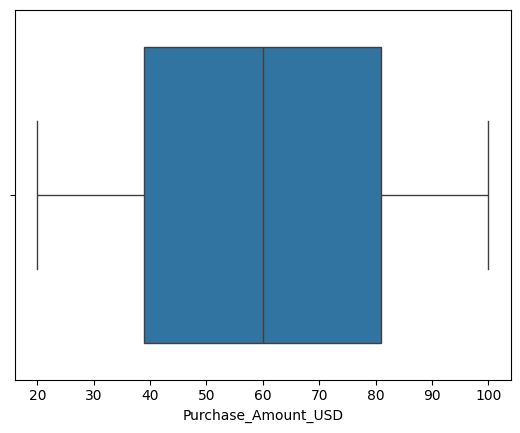

In [12]:
import seaborn as sns
sns.boxplot(x=df['Purchase_Amount_USD'])


In [13]:
df

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [14]:
df.groupby('Gender')['Age'].mean()

Gender
Female    44.007212
Male      44.097285
Name: Age, dtype: float64

In [15]:
df['Item_Purchased'].value_counts()

Item_Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

In [16]:
df['Category'].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [17]:
df.groupby('Category')['Purchase_Amount_USD'].sum()

Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase_Amount_USD, dtype: int64

In [18]:
df.groupby('Location')['Purchase_Amount_USD'].sum()

Location
Alabama           5261
Alaska            4867
Arizona           4326
Arkansas          4828
California        5605
Colorado          4222
Connecticut       4226
Delaware          4758
Florida           3798
Georgia           4645
Hawaii            3752
Idaho             5587
Illinois          5617
Indiana           4655
Iowa              4201
Kansas            3437
Kentucky          4402
Louisiana         4848
Maine             4388
Maryland          4795
Massachusetts     4384
Michigan          4533
Minnesota         4977
Mississippi       4883
Missouri          4691
Montana           5784
Nebraska          5172
Nevada            5514
New Hampshire     4219
New Jersey        3802
New Mexico        5014
New York          5257
North Carolina    4742
North Dakota      5220
Ohio              4649
Oklahoma          4376
Oregon            4243
Pennsylvania      4926
Rhode Island      3871
South Carolina    4439
South Dakota      4236
Tennessee         4772
Texas             4712
Ut

In [19]:
df.groupby('Item_Purchased')['Purchase_Amount_USD'].sum().sort_values(ascending=False)

Item_Purchased
Blouse        10410
Shirt         10332
Dress         10320
Pants         10090
Jewelry       10010
Sunglasses     9649
Belt           9635
Scarf          9561
Sweater        9462
Shorts         9433
Skirt          9402
Hat            9375
Coat           9275
Socks          9252
Jacket         9249
T-shirt        9248
Shoes          9240
Sandals        9200
Boots          9018
Handbag        8857
Hoodie         8767
Backpack       8636
Sneakers       8635
Gloves         8477
Jeans          7548
Name: Purchase_Amount_USD, dtype: int64

In [20]:
df

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [21]:
df.Previous_Purchases.value_counts()

Previous_Purchases
31    97
21    96
14    92
24    91
3     91
4     91
48    90
47    90
5     87
6     87
18    84
20    83
45    83
42    83
1     83
30    82
11    82
33    82
40    82
39    81
32    81
28    80
12    79
34    79
25    79
19    78
27    78
37    78
46    78
26    77
50    77
10    76
15    73
23    73
2     72
44    72
36    71
41    70
16    70
38    70
29    69
13    69
8     67
17    67
7     65
22    65
9     65
43    64
35    63
49    58
Name: count, dtype: int64

In [22]:
df.groupby('Customer_ID')['Previous_Purchases'].value_counts()

Customer_ID  Previous_Purchases
1            14                    1
2            2                     1
3            23                    1
4            49                    1
5            31                    1
                                  ..
3896         32                    1
3897         41                    1
3898         24                    1
3899         24                    1
3900         33                    1
Name: count, Length: 3900, dtype: int64

In [23]:
pd.crosstab(df.Category, df.Item_Purchased)

Item_Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Category,,,,,,,,,,,,,,,,,,,,,
Accessories,143,161,0,0,0,0,140,153,154,0,...,157,0,0,0,0,0,0,161,0,0
Clothing,0,0,171,0,0,166,0,0,0,151,...,0,169,0,157,158,0,159,0,164,147
Footwear,0,0,0,144,0,0,0,0,0,0,...,0,0,150,0,0,145,0,0,0,0
Outerwear,0,0,0,0,161,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
pd.crosstab(df.Category, df.Season)

Season,Fall,Spring,Summer,Winter
Category,,,,
Accessories,324,301,312,303
Clothing,427,454,408,448
Footwear,136,163,160,140
Outerwear,88,81,75,80


In [25]:
df.groupby('Category')['Review_Rating'].mean()

Category
Accessories    3.768629
Clothing       3.723143
Footwear       3.790651
Outerwear      3.746914
Name: Review_Rating, dtype: float64

In [26]:
df.sort_values('Purchase_Amount_USD', ascending=False).head(10)


,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
2842,2843,28,Female,Coat,Outerwear,100,Arizona,L,Green,Fall,4.3,No,Cash,Standard,No,No,48,Debit Card,Quarterly
95,96,37,Male,Sneakers,Footwear,100,Missouri,L,Pink,Fall,3.8,Yes,PayPal,Free Shipping,Yes,Yes,48,PayPal,Monthly
581,582,32,Male,Sweater,Clothing,100,Iowa,XL,Charcoal,Winter,2.7,Yes,Credit Card,Store Pickup,Yes,Yes,12,Bank Transfer,Every 3 Months
1421,1422,68,Male,Dress,Clothing,100,Pennsylvania,S,Gold,Spring,3.0,No,Credit Card,Standard,Yes,Yes,24,Bank Transfer,Fortnightly
3837,3838,45,Female,Hoodie,Clothing,100,New Mexico,M,Green,Spring,4.8,No,Debit Card,Free Shipping,No,No,33,Bank Transfer,Fortnightly
861,862,46,Male,Skirt,Clothing,100,Virginia,XL,Green,Spring,3.3,Yes,PayPal,2-Day Shipping,Yes,Yes,35,Credit Card,Every 3 Months
2214,2215,50,Male,Belt,Accessories,100,Idaho,L,Gold,Fall,4.1,No,Cash,Standard,No,No,20,Debit Card,Weekly
1591,1592,18,Male,Skirt,Clothing,100,South Dakota,L,Gold,Winter,2.9,No,Bank Transfer,Next Day Air,Yes,Yes,24,PayPal,Annually
1456,1457,59,Male,Coat,Outerwear,100,Montana,S,Olive,Spring,2.7,No,Venmo,Store Pickup,Yes,Yes,30,PayPal,Every 3 Months
243,244,25,Male,Jewelry,Accessories,100,Kentucky,M,Olive,Winter,2.8,Yes,Credit Card,2-Day Shipping,Yes,Yes,4,Debit Card,Monthly


In [27]:
df.groupby('Gender')['Purchase_Amount_USD'].mean()


Gender
Female    60.249199
Male      59.536199
Name: Purchase_Amount_USD, dtype: float64

In [28]:
df['Payment_Method'].value_counts()


Payment_Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64

In [29]:
df['Size'].value_counts()


Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

In [30]:
df['Promo_Code_Used'].value_counts()


Promo_Code_Used
No     2223
Yes    1677
Name: count, dtype: int64

In [31]:
df.groupby('Discount_Applied')['Purchase_Amount_USD'].mean()


Discount_Applied
No     60.130454
Yes    59.279070
Name: Purchase_Amount_USD, dtype: float64

In [32]:
df.groupby('Discount_Applied')['Purchase_Amount_USD'].sum()


Discount_Applied
No     133670
Yes     99411
Name: Purchase_Amount_USD, dtype: int64

In [33]:
df.groupby('Season')['Purchase_Amount_USD'].mean()


Season
Fall      61.556923
Spring    58.737738
Summer    58.405236
Winter    60.357364
Name: Purchase_Amount_USD, dtype: float64

In [34]:
df.groupby('Season')['Purchase_Amount_USD'].sum()


Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase_Amount_USD, dtype: int64

In [35]:
df['Subscription_Status'].value_counts()


Subscription_Status
No     2847
Yes    1053
Name: count, dtype: int64

In [36]:
df.groupby('Subscription_Status')['Purchase_Amount_USD'].mean()


Subscription_Status
No     59.865121
Yes    59.491928
Name: Purchase_Amount_USD, dtype: float64

In [37]:
df['Color'].value_counts()


Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

In [38]:
df.groupby('Previous_Purchases')['Purchase_Amount_USD'].mean()


Previous_Purchases
1     58.469880
2     60.333333
3     58.560440
4     61.274725
5     64.252874
6     55.850575
7     61.200000
8     66.671642
9     63.784615
10    58.184211
11    59.500000
12    59.253165
13    55.884058
14    57.967391
15    55.863014
16    62.157143
17    61.462687
18    59.142857
19    57.474359
20    61.891566
21    57.979167
22    54.753846
23    57.904110
24    60.197802
25    61.278481
26    58.870130
27    57.756410
28    61.887500
29    59.739130
30    59.353659
31    57.288660
32    61.530864
33    61.987805
34    54.050633
35    59.269841
36    62.239437
37    60.512821
38    65.142857
39    57.061728
40    54.207317
41    60.757143
42    58.855422
43    61.687500
44    61.291667
45    57.566265
46    59.589744
47    62.655556
48    63.588889
49    56.500000
50    65.272727
Name: Purchase_Amount_USD, dtype: float64

In [39]:
pd.crosstab(df['Preferred_Payment_Method'], df['Frequency_of_Purchases'])


Frequency_of_Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
Preferred_Payment_Method,,,,,,,
Bank Transfer,83,88,85,83,80,109,84
Cash,82,98,94,93,98,104,101
Credit Card,100,79,115,94,107,72,104
Debit Card,101,97,92,95,80,94,77
PayPal,103,88,100,92,97,103,94
Venmo,103,97,98,85,91,81,79


In [40]:
pd.crosstab(df['Category'], df['Frequency_of_Purchases'])


Frequency_of_Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
Category,,,,,,,
Accessories,184,180,180,170,171,189,166
Clothing,258,247,265,223,263,239,242
Footwear,87,80,92,96,75,83,86
Outerwear,43,40,47,53,44,52,45


In [46]:
x=df.groupby('Customer_ID')['Purchase_Amount_USD'].sum().reset_index()
x

,Customer_ID,Purchase_Amount_USD
0,1,53
1,2,64
2,3,73
3,4,90
4,5,49
...,...,...
3895,3896,28
3896,3897,49
3897,3898,33
3898,3899,77


In [47]:
x['Segment'] = pd.qcut(x['Purchase_Amount_USD'], 4, 
                                  labels=['Low Value', 'Mid-Low Value', 'Mid-High Value', 'High Value'])

In [48]:
x

,Customer_ID,Purchase_Amount_USD,Segment
0,1,53,Mid-Low Value
1,2,64,Mid-High Value
2,3,73,Mid-High Value
3,4,90,High Value
4,5,49,Mid-Low Value
...,...,...,...
3895,3896,28,Low Value
3896,3897,49,Mid-Low Value
3897,3898,33,Low Value
3898,3899,77,Mid-High Value
